# Start of PCA

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/actReading_11.csv')


In [2]:
# Dropping ID and binary label
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'is_proficient'])


In [3]:
one_hot_encoded_df2.head()

,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,0.888889,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,0.888889,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [4]:
one_hot_encoded_df2.columns.tolist()

['proficient_score',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_BIOLOGY ADV',
 'course_Bak & Pstr A',
 'course_BandConcer.5',
 'course_BandConcer1C',
 'course_Band

## PCA

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['proficient_score']))

In [6]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 108
Cumulative explained variance: 0.8031976486267409


In [7]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [8]:
first_108_pcs_df = X_pca_df.iloc[:, :108].copy()

In [9]:
import numpy as np

# Get the PCA components (loadings)
components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['proficient_score']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HEALTH 9-12', 'course_DRIVERS ED', 'course_D&TSafetyEd', 'school_High School B', 'course_Health 9-12']
Top features for PC2: ['course_Physical Sci', 'course_English Gr10', 'course_Algebra I B', 'course_Eng Gr10 Adv', 'course_ChemistryAdv']
Top features for PC3: ['course_Ess II:USHis', 'course_Ess: Phy Sci', 'course_Eng Ess 10', 'course_Alg Esntls B', 'course_RdIntrv7-12']
Top features for PC4: ['school_High School B', 'course_BullBogAdv', 'school_High School A', 'course_Panther Adv', 'course_HISTUS1877AC']
Top features for PC5: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_Ess: E & SS', 'course_TranSer 11']
Top features for PC6: ['course_Ess: E & SS', 'course_TranSer 11', 'course_Eng Ess 11', 'course_EssIII:USHis', 'course_Geo Ess']
Top features for PC7: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_USHisIG10ACC', 'course_AlgII/TrigAC']
Top features for PC8: ['school_High School D', 'course_E

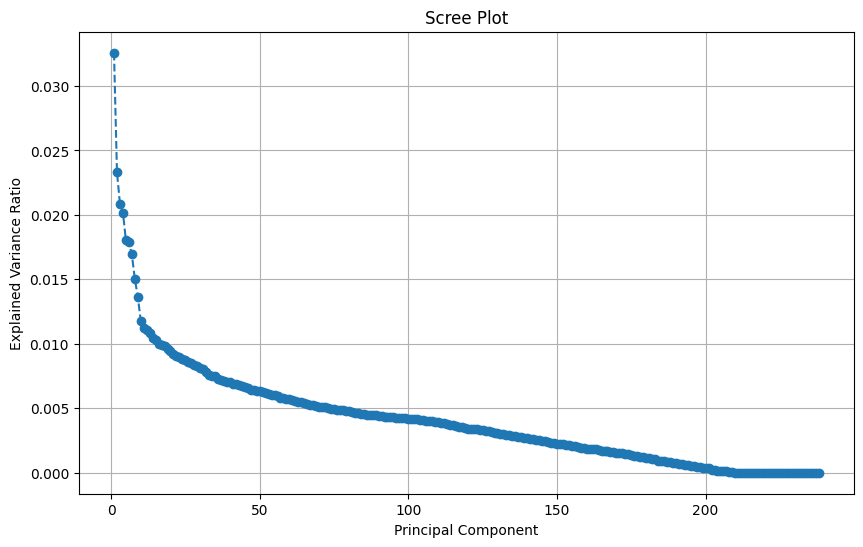

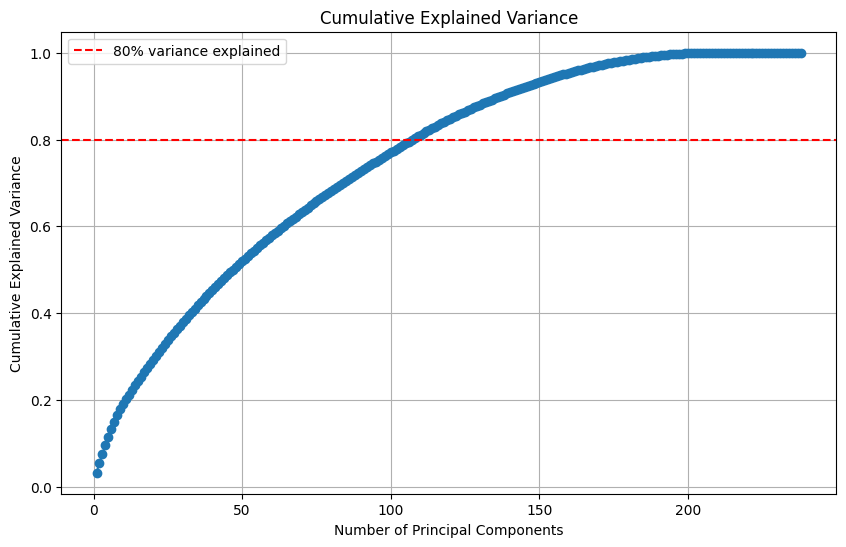

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Start of Modeling

In [11]:

from sklearn.model_selection import train_test_split
import numpy as np


In [12]:

X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3116307	test: 0.3078687	best: 0.3078687 (0)	total: 212ms	remaining: 1m 46s
50:	learn: 0.2292713	test: 0.2470840	best: 0.2470840 (50)	total: 2.27s	remaining: 20s
100:	learn: 0.2089287	test: 0.2301145	best: 0.2301145 (100)	total: 3.87s	remaining: 15.3s
150:	learn: 0.1986068	test: 0.2189023	best: 0.2189023 (150)	total: 5.39s	remaining: 12.5s
200:	learn: 0.1941771	test: 0.2135962	best: 0.2135962 (200)	total: 6.84s	remaining: 10.2s
250:	learn: 0.1920581	test: 0.2106447	best: 0.2106447 (250)	total: 8.43s	remaining: 8.36s
300:	learn: 0.1907738	test: 0.2091306	best: 0.2091306 (300)	total: 10s	remaining: 6.62s
350:	learn: 0.1901119	test: 0.2085248	best: 0.2085248 (350)	total: 11.7s	remaining: 4.96s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2082557883
bestIteration = 380

Shrink model to first 381 iterations.
Mean Squared Error (MSE): 0.04
R-squared (R²): 0.56
Root Mean Squared Error (RMSE): 0.21


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


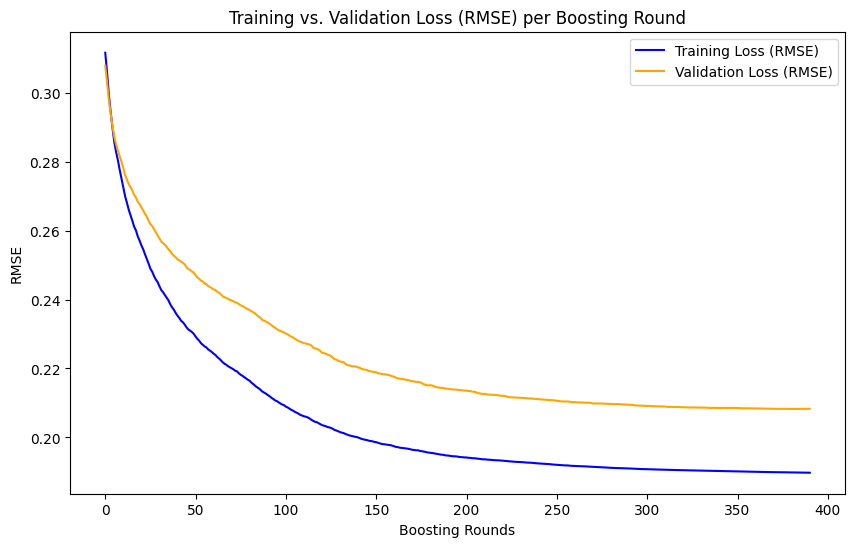

In [13]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Step 4: Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model with logging of evaluation metrics
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'  # Set appropriate evaluation metric for regression
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Extract training and validation loss from the evals result
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['RMSE']
validation_loss = eval_history['validation']['RMSE']

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()


In [14]:
# Get Feature Importance
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)

    Feature Id  Importances
0          PC2    17.141410
1         PC23     2.377732
2          PC4     2.221858
3          PC9     2.206977
4         PC97     2.112854
..         ...          ...
103       PC10     0.218690
104       PC50     0.188653
105       PC19     0.107613
106       PC45     0.078230
107       PC26     0.055793

[108 rows x 2 columns]


In [15]:
# Get feature importance from CatBoost
feature_importances = model.get_feature_importance(prettified=True)

# Filter for features with importance greater than 1
important_features = feature_importances[feature_importances['Importances'] > 1]
print("Features with importance > 1:")
print(important_features)


Features with importance > 1:
   Feature Id  Importances
0         PC2    17.141410
1        PC23     2.377732
2         PC4     2.221858
3         PC9     2.206977
4        PC97     2.112854
5       PC104     1.950163
6        PC66     1.939510
7        PC11     1.860835
8        PC54     1.741898
9         PC7     1.690613
10       PC74     1.595756
11       PC35     1.575354
12        PC6     1.455850
13        PC5     1.375042
14       PC15     1.218801
15       PC93     1.137903
16        PC3     1.131599
17       PC82     1.127578
18       PC67     1.127380
19       PC29     1.124337
20        PC1     1.120389
21       PC89     1.085748
22       PC37     1.079059
23       PC84     1.058748
24       PC87     1.056350
25       PC55     1.047984
26       PC39     1.046406
27       PC18     1.044843


# final xgboost model

Cross-Validated MSE: 0.05
[0]	train-rmse:0.29534	eval-rmse:0.29693
[1]	train-rmse:0.27771	eval-rmse:0.28347
[2]	train-rmse:0.26493	eval-rmse:0.27424
[3]	train-rmse:0.25499	eval-rmse:0.26632
[4]	train-rmse:0.24674	eval-rmse:0.25984
[5]	train-rmse:0.24028	eval-rmse:0.25511
[6]	train-rmse:0.23283	eval-rmse:0.24882
[7]	train-rmse:0.22786	eval-rmse:0.24569
[8]	train-rmse:0.22188	eval-rmse:0.24002
[9]	train-rmse:0.21845	eval-rmse:0.23742
[10]	train-rmse:0.21513	eval-rmse:0.23510
[11]	train-rmse:0.21089	eval-rmse:0.23110
[12]	train-rmse:0.20756	eval-rmse:0.22778
[13]	train-rmse:0.20531	eval-rmse:0.22487
[14]	train-rmse:0.20345	eval-rmse:0.22373
[15]	train-rmse:0.20089	eval-rmse:0.22048
[16]	train-rmse:0.19928	eval-rmse:0.21880
[17]	train-rmse:0.19850	eval-rmse:0.21803
[18]	train-rmse:0.19755	eval-rmse:0.21718
[19]	train-rmse:0.19626	eval-rmse:0.21565
[20]	train-rmse:0.19542	eval-rmse:0.21502
[21]	train-rmse:0.19449	eval-rmse:0.21371
[22]	train-rmse:0.19390	eval-rmse:0.21294
[23]	train-rmse:0.

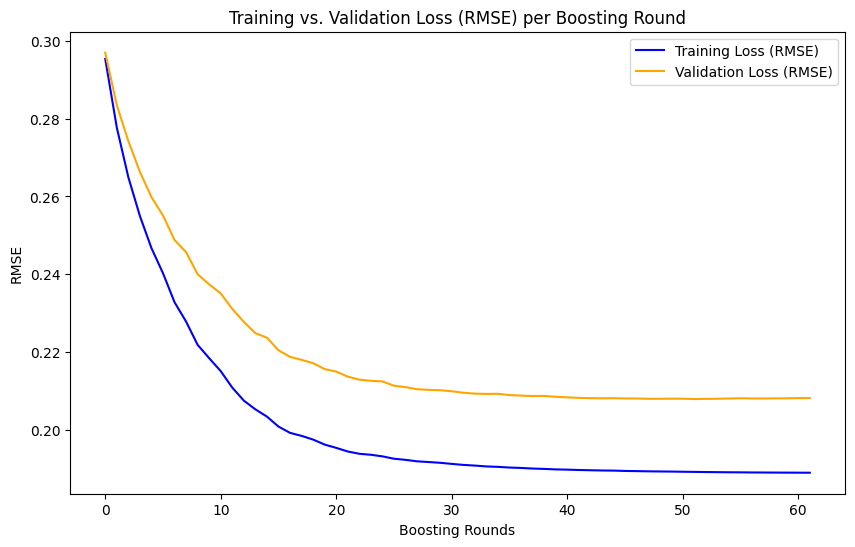

XGBoost - MSE: 0.04, R²: 0.56, RMSE: 0.21


In [16]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, #this affects the r2 th emost
    'learning_rate': 0.2,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


# outlier detection attempts (incomplete/ inaccurate)- but was a start. 

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_continuous_outlier_model(y_true, y_pred, model_name):
    """
    Evaluates the model using continuous value metrics and prints the results.
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    correlation = np.corrcoef(y_true, y_pred)[0, 1]  # Pearson correlation coefficient

    print(f"--- {model_name} ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Correlation Coefficient: {correlation:.4f}")


In [22]:
# Isolation Forest
print("Running Isolation Forest...")
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)  # Fit the model with training data
iso_forest_scores = iso_forest.decision_function(X_train)  # Continuous anomaly scores
evaluate_continuous_outlier_model(y_train, iso_forest_scores, "Isolation Forest")

# Local Outlier Factor (LOF)
print("Running Local Outlier Factor...")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True)
lof.fit(X_train)  # Fit the model with training data
lof_scores = lof.decision_function(X_train)  # Continuous anomaly scores
evaluate_continuous_outlier_model(y_train, lof_scores, "Local Outlier Factor")

# One-Class SVM
print("Running One-Class SVM...")
one_svm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')
one_svm.fit(X_train)  # Fit the model with training data
svm_scores = one_svm.decision_function(X_train)  # Continuous decision function
evaluate_continuous_outlier_model(y_train, svm_scores, "One-Class SVM")

# KMeans
print("Running KMeans Clustering...")
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)  # Fit the model with training data
kmeans_distances = kmeans.transform(X_train).min(axis=1)  # Minimum distance to cluster centers
evaluate_continuous_outlier_model(y_train, kmeans_distances, "KMeans Clustering")

# DBSCAN
print("Running DBSCAN...")
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X_train)  # Fit the model with training data
dbscan_labels = dbscan.labels_  # Cluster labels (-1 indicates outliers)
dbscan_scores = -dbscan_labels  # Higher scores for potential outliers
evaluate_continuous_outlier_model(y_train, dbscan_scores, "DBSCAN")


Running Isolation Forest...
--- Isolation Forest ---
Mean Squared Error (MSE): 0.9737
Mean Absolute Error (MAE): 0.9293
R-squared: -8.5800
Correlation Coefficient: -0.1411

Running Local Outlier Factor...


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


--- Local Outlier Factor ---
Mean Squared Error (MSE): 127237807170603024384.0000
Mean Absolute Error (MAE): 531678845.1127
R-squared: -1251860019481432293376.0000
Correlation Coefficient: 0.0150

Running One-Class SVM...
--- One-Class SVM ---
Mean Squared Error (MSE): 38.3993
Mean Absolute Error (MAE): 5.0267
R-squared: -376.8010
Correlation Coefficient: -0.1287

Running KMeans Clustering...
--- KMeans Clustering ---
Mean Squared Error (MSE): 167.0817
Mean Absolute Error (MAE): 9.9440
R-squared: -1642.8736
Correlation Coefficient: 0.1084

Running DBSCAN...
--- DBSCAN ---
Mean Squared Error (MSE): 266.9150
Mean Absolute Error (MAE): 6.2656
R-squared: -2625.1079
Correlation Coefficient: 0.0492



In [24]:
import xgboost as xgb
print(xgb.__version__)


2.1.3


[0]	train-rmse:0.29534	eval-rmse:0.29693
[1]	train-rmse:0.27771	eval-rmse:0.28347
[2]	train-rmse:0.26493	eval-rmse:0.27424
[3]	train-rmse:0.25499	eval-rmse:0.26632
[4]	train-rmse:0.24674	eval-rmse:0.25984
[5]	train-rmse:0.24028	eval-rmse:0.25511
[6]	train-rmse:0.23283	eval-rmse:0.24882
[7]	train-rmse:0.22786	eval-rmse:0.24569
[8]	train-rmse:0.22188	eval-rmse:0.24002
[9]	train-rmse:0.21845	eval-rmse:0.23742
[10]	train-rmse:0.21513	eval-rmse:0.23510
[11]	train-rmse:0.21089	eval-rmse:0.23110
[12]	train-rmse:0.20756	eval-rmse:0.22778
[13]	train-rmse:0.20531	eval-rmse:0.22487
[14]	train-rmse:0.20345	eval-rmse:0.22373
[15]	train-rmse:0.20089	eval-rmse:0.22048
[16]	train-rmse:0.19928	eval-rmse:0.21880
[17]	train-rmse:0.19850	eval-rmse:0.21803
[18]	train-rmse:0.19755	eval-rmse:0.21718
[19]	train-rmse:0.19626	eval-rmse:0.21565
[20]	train-rmse:0.19542	eval-rmse:0.21502
[21]	train-rmse:0.19449	eval-rmse:0.21371
[22]	train-rmse:0.19390	eval-rmse:0.21294
[23]	train-rmse:0.19365	eval-rmse:0.21265
[2

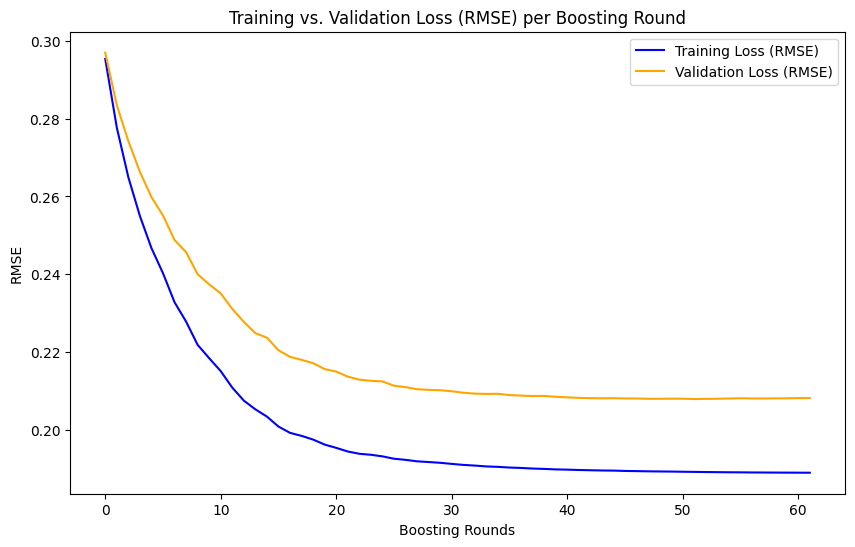

XGBoost - MSE: 0.04, R²: 0.56, RMSE: 0.21


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LOF - RMSE: 0.22, R²: 0.52


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Isolation Forest - RMSE: 0.22, R²: 0.50
One-Class SVM - RMSE: 0.22, R²: 0.50


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
# Chunk 1: Main Model
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, DMatrix, train
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBRegressor
params = {
    'max_depth': 6,
    'learning_rate': 0.2,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}
dtrain = DMatrix(X_train_scaled, label=y_train)
dtest = DMatrix(X_test_scaled, label=y_test)

evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=True
)

# Extract training and validation loss
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions and evaluate the model
xgb_y_pred = xgb_model_trained.predict(dtest)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")

# Chunk 2: Outlier Detection and Adjustment
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# -----------------
# Local Outlier Factor (LOF)
# -----------------
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outlier_labels = lof.fit_predict(X_train_scaled)

# Filter out outliers
X_train_lof_cleaned = X_train_scaled[lof_outlier_labels == 1]
y_train_lof_cleaned = y_train[lof_outlier_labels == 1]

# -----------------
# Isolation Forest
# -----------------
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_outlier_labels = isolation_forest.fit_predict(X_train_scaled)
X_train_iso_cleaned = X_train_scaled[isolation_outlier_labels == 1]
y_train_iso_cleaned = y_train[isolation_outlier_labels == 1]

# -----------------
# One-Class SVM
# -----------------
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
svm_outlier_labels = one_class_svm.fit_predict(X_train_scaled)
X_train_svm_cleaned = X_train_scaled[svm_outlier_labels == 1]
y_train_svm_cleaned = y_train[svm_outlier_labels == 1]

# Chunk 3: Model Training with Cleaned Data
# Train XGBRegressor with LOF-cleaned data
xgb_model_lof = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_lof.fit(X_train_lof_cleaned, y_train_lof_cleaned)
lof_y_pred = xgb_model_lof.predict(X_test_scaled)
lof_rmse = mean_squared_error(y_test, lof_y_pred, squared=False)
lof_r2 = r2_score(y_test, lof_y_pred)
print(f"LOF - RMSE: {lof_rmse:.2f}, R²: {lof_r2:.2f}")

# Train XGBRegressor with Isolation Forest-cleaned data
xgb_model_iso = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_iso.fit(X_train_iso_cleaned, y_train_iso_cleaned)
iso_y_pred = xgb_model_iso.predict(X_test_scaled)
iso_rmse = mean_squared_error(y_test, iso_y_pred, squared=False)
iso_r2 = r2_score(y_test, iso_y_pred)
print(f"Isolation Forest - RMSE: {iso_rmse:.2f}, R²: {iso_r2:.2f}")

# Train XGBRegressor with One-Class SVM-cleaned data
xgb_model_svm = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_svm.fit(X_train_svm_cleaned, y_train_svm_cleaned)
svm_y_pred = xgb_model_svm.predict(X_test_scaled)
svm_rmse = mean_squared_error(y_test, svm_y_pred, squared=False)
svm_r2 = r2_score(y_test, svm_y_pred)
print(f"One-Class SVM - RMSE: {svm_rmse:.2f}, R²: {svm_r2:.2f}")


In [28]:
# Filter only numeric columns for HDBSCAN cluster profiling
numeric_cols = first_108_pcs_df2.select_dtypes(include=[np.number])
hdbscan_profiles = numeric_cols.groupby(first_108_pcs_df2['HDBSCAN_Cluster']).mean()

# Profiling HDBSCAN clusters
hdbscan_top_features = {
    cluster: hdbscan_profiles.loc[cluster].nlargest(3).index.tolist()
    for cluster in hdbscan_profiles.index if cluster != -1
}

# Assign cluster names for HDBSCAN
hdbscan_cluster_names = {
    cluster: f"Cluster-{cluster} ({', '.join(features)})"
    for cluster, features in hdbscan_top_features.items()
}
first_108_pcs_df2['Cluster_Name_HDBSCAN'] = first_108_pcs_df2['HDBSCAN_Cluster'].map(hdbscan_cluster_names)

# Print cluster details
print(f"HDBSCAN clusters: {set(hdbscan_labels)}")
print(f"HDBSCAN cluster sizes: {hdbscan_cluster_counts}")


HDBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, -1}
HDBSCAN cluster sizes: Counter({-1: 1232, 96: 977, 26: 46, 53: 39, 45: 36, 32: 36, 84: 34, 52: 32, 25: 29, 33: 28, 12: 28, 88: 28, 46: 27, 36: 27, 83: 25, 55: 25, 97: 25, 43: 24, 77: 24, 90: 24, 65: 23, 94: 23, 95: 23, 64: 22, 16: 22, 85: 21, 21: 21, 60: 20, 14: 20, 30: 20, 70: 20, 107: 19, 86: 19, 98: 18, 93: 18, 92: 18, 10: 18, 106: 18, 108: 17, 2: 17, 56: 17, 68: 16, 29: 16, 6: 16, 80: 16, 27: 16, 13: 16, 19: 16, 17: 16, 103: 16, 18: 16, 40: 16, 20: 16, 102: 16, 39: 15, 9: 14, 44: 14, 11: 14, 15: 14, 49: 14, 76: 14, 8: 14, 

In [31]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
import hdbscan
import numpy as np
import pandas as pd

# Assuming `first_108_pcs_df2` is your DataFrame

# Select only numeric columns for clustering
numeric_data = first_108_pcs_df2.select_dtypes(include=[np.number])

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(numeric_data)  # Use only numeric data
first_108_pcs_df2['DBSCAN_Cluster'] = dbscan_labels
dbscan_cluster_counts = first_108_pcs_df2['DBSCAN_Cluster'].value_counts()

# Profiling DBSCAN Clusters
dbscan_profiles = numeric_data.groupby(first_108_pcs_df2['DBSCAN_Cluster']).mean()
dbscan_top_features = {
    cluster: dbscan_profiles.loc[cluster].nlargest(3).index.tolist()
    for cluster in dbscan_profiles.index if cluster != -1
}

# Assign cluster names for DBSCAN
dbscan_cluster_names = {
    cluster: f"Cluster-{cluster} ({', '.join(features)})"
    for cluster, features in dbscan_top_features.items()
}
first_108_pcs_df2['Cluster_Name_DBSCAN'] = first_108_pcs_df2['DBSCAN_Cluster'].map(dbscan_cluster_names)

# HDBSCAN Clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
hdbscan_labels = hdbscan_clusterer.fit_predict(numeric_data)  # Use only numeric data
first_108_pcs_df2['HDBSCAN_Cluster'] = hdbscan_labels
hdbscan_cluster_counts = first_108_pcs_df2['HDBSCAN_Cluster'].value_counts()

# Profiling HDBSCAN Clusters
hdbscan_profiles = numeric_data.groupby(first_108_pcs_df2['HDBSCAN_Cluster']).mean()
hdbscan_top_features = {
    cluster: hdbscan_profiles.loc[cluster].nlargest(3).index.tolist()
    for cluster in hdbscan_profiles.index if cluster != -1
}

# Assign cluster names for HDBSCAN
hdbscan_cluster_names = {
    cluster: f"Cluster-{cluster} ({', '.join(features)})"
    for cluster, features in hdbscan_top_features.items()
}
first_108_pcs_df2['Cluster_Name_HDBSCAN'] = first_108_pcs_df2['HDBSCAN_Cluster'].map(hdbscan_cluster_names)

# Print cluster information
print(f"DBSCAN clusters: {set(dbscan_labels)}")
print(f"DBSCAN cluster sizes: {dbscan_cluster_counts}")
print(f"HDBSCAN clusters: {set(hdbscan_labels)}")
print(f"HDBSCAN cluster sizes: {hdbscan_cluster_counts}")


DBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, -1}
DBSCAN cluster sizes: DBSCAN_Cluster
-1     2109
 0      977
 89      28
 88      25
 90      24
       ... 
 16       6
 62       6
 23       5
 75       5
 40       5
Name: count, Length: 92, dtype: int64
HDBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101

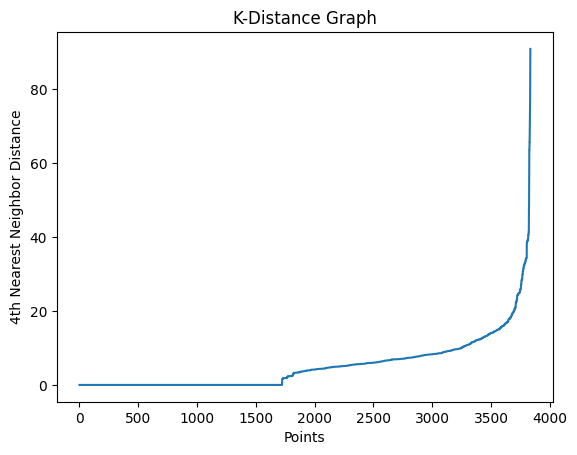

DBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, -1}
DBSCAN cluster sizes: DBSCAN_Cluster
-1     2111
 26     967
 97      28
 96      25
 98      24
       ... 
 41       6
 35       6
 22       5
 40       5
 81       5
Name: count, Length: 100, dtype: int64
HDBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,

In [32]:
# Import necessary libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import hdbscan
import numpy as np
import pandas as pd

# Assuming first_108_pcs_df2 is your DataFrame
# Ensure we only work with numeric columns for clustering
numeric_data = first_108_pcs_df2.select_dtypes(include=[np.number])

# K-Nearest Neighbors (KNN) for determining the optimal epsilon for DBSCAN
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(numeric_data)
distances, indices = neighbors_fit.kneighbors(numeric_data)

# Sort distances for k-distance graph
distances = np.sort(distances, axis=0)
k_distances = distances[:, 4]  # 4th neighbor distance (k=5)

# Plot k-distance graph to determine the "elbow"
import matplotlib.pyplot as plt
plt.plot(k_distances)
plt.title("K-Distance Graph")
plt.xlabel("Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps based on k-distance graph
dbscan_labels = dbscan.fit_predict(numeric_data)
first_108_pcs_df2['DBSCAN_Cluster'] = dbscan_labels
dbscan_cluster_counts = first_108_pcs_df2['DBSCAN_Cluster'].value_counts()

# Profiling DBSCAN Clusters
dbscan_profiles = numeric_data.groupby(first_108_pcs_df2['DBSCAN_Cluster']).mean()
dbscan_top_features = {
    cluster: dbscan_profiles.loc[cluster].nlargest(3).index.tolist()
    for cluster in dbscan_profiles.index if cluster != -1
}

# Assign cluster names for DBSCAN
dbscan_cluster_names = {
    cluster: f"Cluster-{cluster} ({', '.join(features)})"
    for cluster, features in dbscan_top_features.items()
}
first_108_pcs_df2['Cluster_Name_DBSCAN'] = first_108_pcs_df2['DBSCAN_Cluster'].map(dbscan_cluster_names)

# HDBSCAN Clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
hdbscan_labels = hdbscan_clusterer.fit_predict(numeric_data)
first_108_pcs_df2['HDBSCAN_Cluster'] = hdbscan_labels
hdbscan_cluster_counts = first_108_pcs_df2['HDBSCAN_Cluster'].value_counts()

# Profiling HDBSCAN Clusters
hdbscan_profiles = numeric_data.groupby(first_108_pcs_df2['HDBSCAN_Cluster']).mean()
hdbscan_top_features = {
    cluster: hdbscan_profiles.loc[cluster].nlargest(3).index.tolist()
    for cluster in hdbscan_profiles.index if cluster != -1
}

# Assign cluster names for HDBSCAN
hdbscan_cluster_names = {
    cluster: f"Cluster-{cluster} ({', '.join(features)})"
    for cluster, features in hdbscan_top_features.items()
}
first_108_pcs_df2['Cluster_Name_HDBSCAN'] = first_108_pcs_df2['HDBSCAN_Cluster'].map(hdbscan_cluster_names)

# Output cluster information
print(f"DBSCAN clusters: {set(dbscan_labels)}")
print(f"DBSCAN cluster sizes: {dbscan_cluster_counts}")
print(f"HDBSCAN clusters: {set(hdbscan_labels)}")
print(f"HDBSCAN cluster sizes: {hdbscan_cluster_counts}")


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Step 1: Label Outliers
first_108_pcs_df2['Is_Outlier_DBSCAN'] = (first_108_pcs_df2['DBSCAN_Cluster'] == -1).astype(int)
first_108_pcs_df2['Is_Outlier_HDBSCAN'] = (first_108_pcs_df2['HDBSCAN_Cluster'] == -1).astype(int)

# Step 2: Prepare Features and Labels for the Model
# Use numeric features for training
X = numeric_data.copy()
y_dbscan = first_108_pcs_df2['Is_Outlier_DBSCAN']
y_hdbscan = first_108_pcs_df2['Is_Outlier_HDBSCAN']

# Split data into train and test sets
X_train, X_test, y_train_dbscan, y_test_dbscan = train_test_split(X, y_dbscan, test_size=0.2, random_state=42)
X_train, X_test, y_train_hdbscan, y_test_hdbscan = train_test_split(X, y_hdbscan, test_size=0.2, random_state=42)

# Step 3: Train XGBoost Classifier for DBSCAN Outliers
xgb_outlier_detector_dbscan = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

xgb_outlier_detector_dbscan.fit(X_train, y_train_dbscan)

# Step 4: Evaluate DBSCAN Outlier Detection
y_pred_dbscan = xgb_outlier_detector_dbscan.predict(X_test)
print("DBSCAN Outlier Detection Report:")
print(classification_report(y_test_dbscan, y_pred_dbscan))

# Step 5: Train XGBoost Classifier for HDBSCAN Outliers
xgb_outlier_detector_hdbscan = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

xgb_outlier_detector_hdbscan.fit(X_train, y_train_hdbscan)

# Step 6: Evaluate HDBSCAN Outlier Detection
y_pred_hdbscan = xgb_outlier_detector_hdbscan.predict(X_test)
print("HDBSCAN Outlier Detection Report:")
print(classification_report(y_test_hdbscan, y_pred_hdbscan))


DBSCAN Outlier Detection Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       424

    accuracy                           1.00       767
   macro avg       1.00      1.00      1.00       767
weighted avg       1.00      1.00      1.00       767

HDBSCAN Outlier Detection Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       0.98      0.99      0.98        83

    accuracy                           1.00       767
   macro avg       0.99      0.99      0.99       767
weighted avg       1.00      1.00      1.00       767

